# 🧾 4.5 – Laboratorio: Sistema de Facturación Orientado a Objetos

Este laboratorio integra todos los conceptos del módulo de POO: **clases, herencia, abstracción, polimorfismo, composición y agregación**.

Construiremos un **mini sistema de facturación**, capaz de:
- Crear clientes y productos.
- Generar facturas con líneas de detalle.
- Calcular subtotales e IVA.
- Mostrar el total final.

---
## 🎯 Objetivos
- Aplicar herencia y composición en un caso realista.
- Practicar relaciones entre objetos (Cliente, Factura, Línea, Producto).
- Implementar métodos que calculen totales y representen objetos de forma legible.
- Consolidar la lógica OOP con un sistema funcional completo.

In [1]:
print('✅ Laboratorio 4.5 – Sistema de Facturación listo para usar.')

✅ Laboratorio 4.5 – Sistema de Facturación listo para usar.


---
## 1️⃣ Estructura general del sistema

Nuestro sistema tendrá las siguientes clases:

| Clase | Tipo | Relación | Descripción |
|:------|:------|:----------|:-------------|
| `Producto` | Independiente | — | Representa un producto con nombre y precio. |
| `Cliente` | Independiente | — | Representa un cliente con datos básicos. |
| `LineaFactura` | Compuesta | ➡️ Producto | Representa una línea de detalle de una factura. |
| `Factura` | Agregadora | ➡️ Cliente / LineaFactura | Contiene las líneas y asocia un cliente. |

### 🧩 Ejercicio 1 — Clase `Producto`
Crea una clase `Producto` con atributos `codigo`, `nombre`, `precio_unitario`.
Incluye un método `__str__()` que devuelva una cadena legible.

💡 *Pista:* usa f-strings para mostrar el código y el precio con 2 decimales.

In [2]:
# Escribe aquí tu clase Producto...

class Producto:
    def __init__(self, codigo, nombre, precio_unitario):
        self.codigo = codigo
        self.nombre = nombre
        self.precio_unitario = precio_unitario

    def __str__(self):
        return f'Producto: {self.nombre} - Código: {self.codigo} - Precio: {self.precio_unitario:.2f}$'
    
producto_1 = Producto('Z001', 'Zapatillas', 90)
print(producto_1)

Producto: Zapatillas - Código: Z001 - Precio: 90.00$


### ✅ Solución propuesta

In [3]:
class Producto:
    def __init__(self, codigo, nombre, precio_unitario):
        self.codigo = codigo
        self.nombre = nombre
        self.precio_unitario = precio_unitario

    def __str__(self):
        return f'[{self.codigo}] {self.nombre} - {self.precio_unitario:.2f}€'

p1 = Producto('P001', 'Teclado', 25.99)
print(p1)

[P001] Teclado - 25.99€


---
## 2️⃣ Clase `Cliente`
Crea una clase `Cliente` con atributos `nombre`, `email`, `telefono`.
Implementa `__str__()` para mostrar los datos del cliente de forma amigable.

In [4]:
# Implementa aquí la clase Cliente...

class Cliente:
    def __init__(self, nombre, email, telefono):
        self.nombre = nombre
        self.email = email
        self.telefono = telefono

    def __str__(self):
        return f'Nombre: {self.nombre} - Email: {self.email} - Teléfono: {self.telefono}'
    
cliente_1 = Cliente('Yoni', 'yoni@yahoo.es', '600000000')
print(cliente_1)

Nombre: Yoni - Email: yoni@yahoo.es - Teléfono: 600000000


### ✅ Solución propuesta

In [5]:
class Cliente:
    def __init__(self, nombre, email, telefono):
        self.nombre = nombre
        self.email = email
        self.telefono = telefono

    def __str__(self):
        return f'{self.nombre} <{self.email}> ({self.telefono})'

c1 = Cliente('David Pérez', 'david@example.com', '600123456')
print(c1)

David Pérez <david@example.com> (600123456)


**RECORDATORIO:**

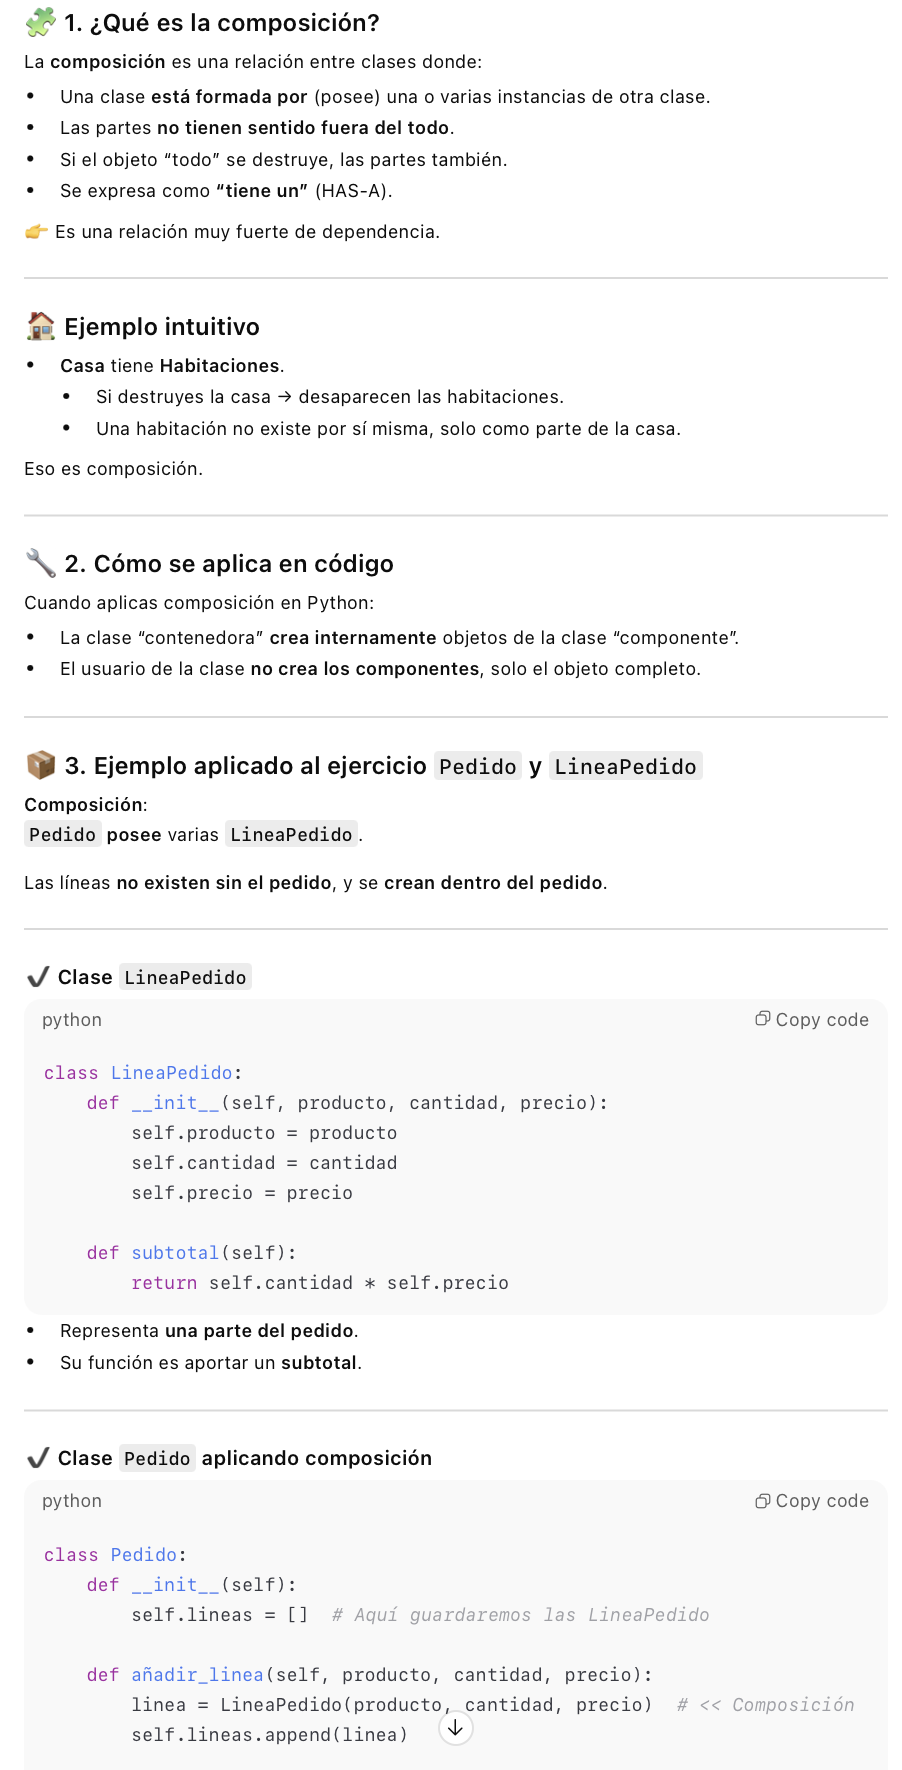
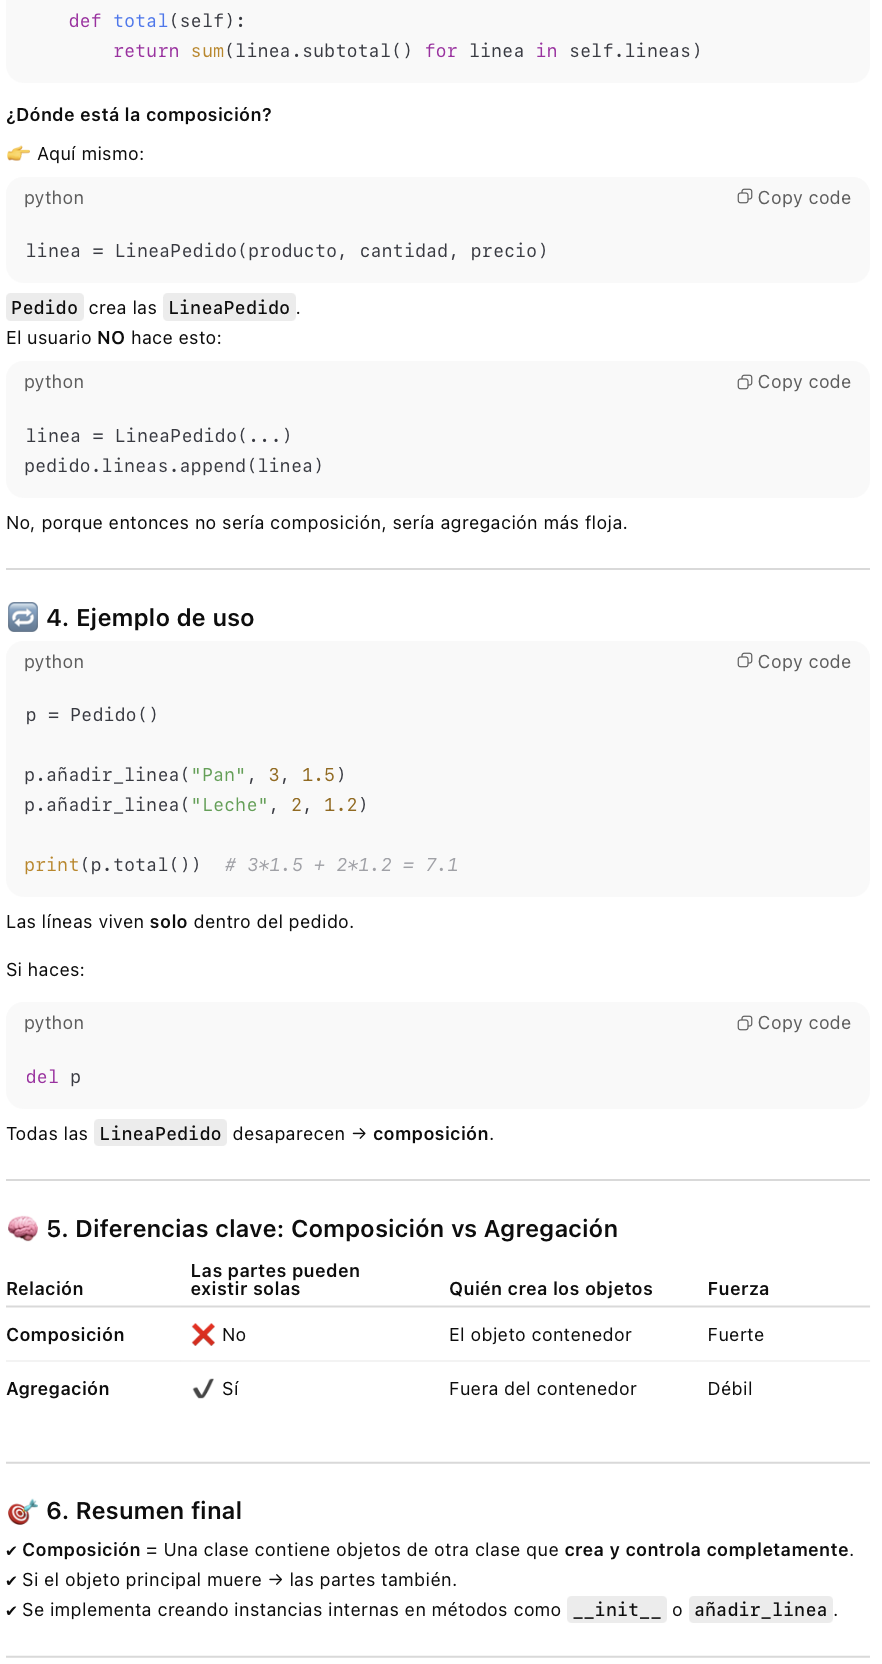

---
## 3️⃣ Clase `LineaFactura` (composición con Producto)

Crea una clase `LineaFactura` que reciba un `Producto` y una cantidad.
Debe incluir un método `subtotal()` que multiplique la cantidad por el precio del producto.
También implementa `__str__()` para mostrar el detalle.

💡 *Pista:* el `Producto` se **inyecta** desde fuera, pero la `LineaFactura` es creada dentro de la `Factura` (composición).

In [9]:
# Escribe aquí tu clase LineaFactura...

class LineaFactura:
    def __init__(self, producto, cantidad):
        self.producto = producto # Aquí está la composición
        self.cantidad = cantidad

    def subtotal(self):
        return self.cantidad * self.producto.precio_unitario

    def __str__(self):
        return f'{self.producto.nombre} ({self.producto.precio_unitario}$)x {self.cantidad} -> {self.subtotal():.2f}$'
    
l1 = LineaFactura(producto_1, 100)
print(l1)

Zapatillas (90$)x 100 -> 9000.00$


### ✅ Solución propuesta

In [10]:
class LineaFactura:
    def __init__(self, producto, cantidad):
        self.producto = producto
        self.cantidad = cantidad

    def subtotal(self):
        return self.cantidad * self.producto.precio_unitario

    def __str__(self):
        return f'{self.producto.nombre} x {self.cantidad} → {self.subtotal():.2f}€'

linea = LineaFactura(Producto('P002', 'Ratón', 15.5), 2)
print(linea)

Ratón x 2 → 31.00€


---
## 4️⃣ Clase `Factura` (agregación con Cliente + composición con Líneas)

Crea una clase `Factura` que:
- Reciba un objeto `Cliente`.
- Contenga una lista de `LineasFactura`.
- Permita añadir líneas con `añadir_linea(producto, cantidad)`.
- Calcule el total con IVA (21%) mediante `total_con_iva()`.
- Muestre toda la información con `mostrar_factura()`.

💡 *Pista:* usa comprensión de listas para mostrar las líneas.

In [11]:
# Implementa aquí tu clase Factura...

class Factura:
    def __init__(self, cliente, lineas_factura):
        self.cliente = cliente # recibe un objeto cliente -> agregación. Usa cliente, pero cliente puede existir
                                # por sí mismo.
        self.lineas_factura = [] # se crea una linea_factura por cada factura

    def añadir_linea(self, producto, cantidad):
        self.lineas_factura.append(LineaFactura(producto, cantidad))

    def total(self):
        return sum(l.subtotal() for l in self.lineas_factura)
    
    def total_con_iva(self):
        return self.total() * 1.21
    
    def mostrar_factura(self):
        return self.lineas_factura


### ✅ Solución propuesta

In [12]:
class Factura:
    def __init__(self, cliente):
        self.cliente = cliente
        self.lineas = []

    def añadir_linea(self, producto, cantidad):
        self.lineas.append(LineaFactura(producto, cantidad)) # se accede así porque LineaFactura es un nombre de clase,
    # no un atributo de la instancia Factura. Está definida fuera de Factura, así que se accede directamente por su
    # nombre.

    # self solo sirve para acceder a atributos del propio objeto, no a clases externas.

    # no se pone self dentro de los argumentos porque no estás definiendo nada. Se está creando un objeto LineaFactura

    def total(self):
        return sum(l.subtotal() for l in self.lineas)

    def total_con_iva(self):
        return self.total() * 1.21

    def mostrar_factura(self):
        print('🧾 FACTURA')
        print('Cliente:', self.cliente)
        print('\nLíneas:')
        for l in self.lineas:
            print('-', l)
        print('\nSubtotal:', f'{self.total():.2f}€')
        print('IVA (21%):', f'{self.total()*0.21:.2f}€')
        print('TOTAL:', f'{self.total_con_iva():.2f}€')

c = Cliente('David Pérez', 'david@example.com', '600123456')
f = Factura(c)
f.añadir_linea(Producto('P003', 'Pantalla', 150), 1)
f.añadir_linea(Producto('P004', 'Cable HDMI', 10), 2)
f.mostrar_factura()

🧾 FACTURA
Cliente: David Pérez <david@example.com> (600123456)

Líneas:
- Pantalla x 1 → 150.00€
- Cable HDMI x 2 → 20.00€

Subtotal: 170.00€
IVA (21%): 35.70€
TOTAL: 205.70€


---
## 5️⃣ Extensión — Herencia y polimorfismo

Extiende el sistema creando una subclase `FacturaReducida` (IVA 10%) que herede de `Factura` y sobrescriba el método `total_con_iva()`.

💡 *Reto adicional:* añade un método `exportar()` que devuelva una cadena JSON con los datos de la factura.

In [13]:
# 💡 Implementa aquí la clase FacturaReducida heredando de Factura

### ✅ Solución propuesta

In [14]:
import json

class FacturaReducida(Factura):
    def total_con_iva(self):
        return self.total() * 1.10

    def exportar(self):
        datos = {
            'cliente': str(self.cliente),
            'total': round(self.total_con_iva(), 2),
            'lineas': [str(l) for l in self.lineas]
        }
        return json.dumps(datos, ensure_ascii=False, indent=2)

f2 = FacturaReducida(c)
f2.añadir_linea(Producto('P005', 'Tablet', 200), 1)
print(f2.exportar())

{
  "cliente": "David Pérez <david@example.com> (600123456)",
  "total": 220.0,
  "lineas": [
    "Tablet x 1 → 200.00€"
  ]
}


---
## 🧠 Resumen del laboratorio

- Has combinado **herencia, composición y agregación** en un sistema funcional.
- Has usado polimorfismo para extender comportamientos (`Factura` → `FacturaReducida`).
- Has aplicado buenas prácticas de encapsulación y legibilidad.
- Este modelo puede evolucionar fácilmente hacia un **sistema completo de gestión de ventas**.

💡 Fin del **Módulo 4 – Programación Orientada a Objetos**.
A continuación → **Módulo 5 – Programación Funcional en Python.**